<a href="https://colab.research.google.com/github/angel870326/Hierarchical-Clustering/blob/main/pca2_hierarchical_clustering_text.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

> 2022.04.09 Ssu-Yun Wang<br/>
[Github @angel870326](https://github.com/angel870326)

#**Hierarchical Clustering (Revised Version)**

***Reduce data to two dimensions before clustering.***

<br/>

This is an example of hierarchical clustering for ***text data with missing values*** by using the clustering package [scipy.cluster.hierarchy](https://docs.scipy.org/doc/scipy/reference/cluster.hierarchy.html). 

The dataset I used do not need the process of stopwords removing, stemming or tokenization. It is quite similar to categorial data but with text instead of label in each cell. Therefore, each observation can be regarded as a document, and each column (except for ID) can be regarded as a feature for the observation. You will see how to deal with missing values in section 1.2. We can transfer each observation into an tf-idf vector and calculate cosine similarities between observations just like what we do in document clustering. 

In section 1.4 and 1.5, you will see four kinds of clustering method, including single-link, complete-link, group average and Ward algorithm, and how to generate clustering results with a threshold. 

<br/>

####**Contents:**

1.1 Read file<br/>
1.2 Data preprocessing<br/>
1.3 Cosine similarity & distance<br/>
1.4 Hierarchical clustering<br/>
1.5 Set a threshold<br/>
1.6 Save the results<br/>
1.7 Visualization<br/>

<br/>

In [2]:
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt

In [3]:
# sConnect to the Google Drive
from google.colab import drive
drive.mount("/content/gdrive")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


##**1. Text Clustering**

###**1.1 Read file**


---



In [4]:
data = pd.read_csv('/content/gdrive/Shareddrives/110-2 Capstone/最終資料檔/Text Clustering/building_tm.csv')

# Number of observations and variables
print(data.shape)
# Overview dataset
data.describe()

(18196, 13)


,c0101,c0114,c0129,c0162,age_Category,c0121_Category,c0106_new,c0118_new,c0179_new,c0123_new,c0122_new,c0158_new,city
count,18196,13047,16284,18196,18196,18196,17776,18196,18196,11726,18196,18196,18196
unique,18196,45,5,2,9,4,8,4,2,3,2,2,8
top,0000001,南,24小時,重點,二十六年至三十年屋齡,少戶數,鋼筋混凝土,中公設比,近一年有實價登錄,臨單線道,有平面車位,無機械車位,臺北市
freq,1,2376,12048,9752,3935,8117,16762,6477,13033,8937,11268,14205,5554


###**1.2 Data preprocessing**


---



####***1.2.1 Concatenate cells(features) into a string with separator (ignore NA)***




In [5]:
df = pd.DataFrame(data.c0101)
df['content'] = data.iloc[:,1:].apply(lambda x: ','.join(x.dropna().values.tolist()), axis=1)
labels = np.array(df['c0101'])
df

,c0101,content
0,0000001,"西南,24小時,重點,三十一年至三十五年屋齡,少戶數,鋼筋混凝土,小公設比,近一年有實價登錄..."
1,0000008,"西南,24小時,一般,二十六年至三十年屋齡,少戶數,鋼筋混凝土,中公設比,近一年無實價登錄,..."
2,0000010,"東北,24小時,重點,二十六年至三十年屋齡,極多戶數,鋼骨鋼筋混凝土,小公設比,近一年有實價..."
3,0000011,"西南,日間管理,一般,二十六年至三十年屋齡,少戶數,鋼筋混凝土,中公設比,近一年有實價登錄,..."
4,0000012,"東北,24小時,重點,二十六年至三十年屋齡,極多戶數,鋼筋混凝土,中公設比,近一年無實價登錄..."
...,...,...
18191,Y001265,"南,24小時,重點,十一年至十五年屋齡,少戶數,鋼筋混凝土,中公設比,近一年有實價登錄,臨多..."
18192,Y001266,"北,24小時,重點,六年至十年屋齡,多戶數,鋼筋混凝土,大公設比,近一年有實價登錄,有平面車..."
18193,Y001273,"西,24小時,重點,十一年至十五年屋齡,極少戶數,鋼筋混凝土,大公設比,近一年無實價登錄,有..."
18194,Y001276,"24小時,一般,十一年至十五年屋齡,極少戶數,鋼筋混凝土,中公設比,近一年有實價登錄,臨多線..."


####***1.2.2 Tf-idf vectorizer***


In [6]:
# text contents in dataframe to array
contents = np.array(df['content']) 
contents

# tfidf vectorizer
vectorizer = TfidfVectorizer(token_pattern=r'(?u)\b\w+\b') 
tfidf_matrix = vectorizer.fit_transform(contents)
tfidf_matrix

# See the first vector (optional)
first_vector = tfidf_matrix[0]
first_dict = pd.DataFrame(first_vector.T.todense(), index = vectorizer.get_feature_names_out(), columns = ["tfidf"])

# See all terms
terms = vectorizer.get_feature_names_out()
print("Terms: ",terms)

# Store vectorized texts in df
df['tfidf'] = list(tfidf_matrix.toarray())
df

Terms:  ['24小時' '一般' '三十一年至三十五年屋齡' '三十六年至四十年屋齡' '中公設比' '二十六年至三十年屋齡' '二十年至二十五年屋齡'
 '五年內屋齡' '六年至十年屋齡' '其他' '其他管理形式' '加強磚造' '北' '十一年至十五年屋齡' '十六年至二十年屋齡' '南'
 '四十年以上屋齡' '多戶數' '多方位' '夜間管理' '大公設比' '小公設比' '少戶數' '新北市' '新竹市' '新竹縣' '日間管理'
 '有平面車位' '有機械車位' '東' '東北' '東南' '桃園市' '極多戶數' '極少戶數' '無平面車位' '無機械車位' '無管理'
 '磚造' '臨單線道' '臨多線道' '臨雙線道' '臺中市' '臺北市' '臺南市' '西' '西北' '西南' '近一年有實價登錄'
 '近一年無實價登錄' '重點' '鋼筋混凝土' '鋼骨' '鋼骨鋼筋混凝土' '鐵筋混凝土' '零公設比' '預鑄' '高雄市']


,c0101,content,tfidf
0,0000001,"西南,24小時,重點,三十一年至三十五年屋齡,少戶數,鋼筋混凝土,小公設比,近一年有實價登錄...","[0.18752695929632016, 0.0, 0.474967137800667, ..."
1,0000008,"西南,24小時,一般,二十六年至三十年屋齡,少戶數,鋼筋混凝土,中公設比,近一年無實價登錄,...","[0.19834062531585014, 0.2482541806418836, 0.0,..."
2,0000010,"東北,24小時,重點,二十六年至三十年屋齡,極多戶數,鋼骨鋼筋混凝土,小公設比,近一年有實價...","[0.14704310415879734, 0.0, 0.0, 0.0, 0.0, 0.26..."
3,0000011,"西南,日間管理,一般,二十六年至三十年屋齡,少戶數,鋼筋混凝土,中公設比,近一年有實價登錄,...","[0.0, 0.23457981007404105, 0.0, 0.0, 0.2697681..."
4,0000012,"東北,24小時,重點,二十六年至三十年屋齡,極多戶數,鋼筋混凝土,中公設比,近一年無實價登錄...","[0.1695757006148546, 0.0, 0.0, 0.0, 0.24408920..."
...,...,...,...
18191,Y001265,"南,24小時,重點,十一年至十五年屋齡,少戶數,鋼筋混凝土,中公設比,近一年有實價登錄,臨多...","[0.1928042716989237, 0.0, 0.0, 0.0, 0.27752467..."
18192,Y001266,"北,24小時,重點,六年至十年屋齡,多戶數,鋼筋混凝土,大公設比,近一年有實價登錄,有平面車...","[0.1914474775529637, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
18193,Y001273,"西,24小時,重點,十一年至十五年屋齡,極少戶數,鋼筋混凝土,大公設比,近一年無實價登錄,有...","[0.20096878889868428, 0.0, 0.0, 0.0, 0.0, 0.0,..."
18194,Y001276,"24小時,一般,十一年至十五年屋齡,極少戶數,鋼筋混凝土,中公設比,近一年有實價登錄,臨多線...","[0.1961306618175806, 0.2454880671609076, 0.0, ..."


####***1.2.3 Dimensionality reduction by PCA***

In [7]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2) 
tfidf_pca = pca.fit_transform(tfidf_matrix.toarray())

###**1.3 Cosine similarity & distance**


---


In [8]:
from sklearn.metrics.pairwise import cosine_similarity
# dist = 1 - cosine_similarity(tfidf_matrix)
dist = 1 - cosine_similarity(tfidf_pca)
print

<function print>

###**1.4 Hierarchical clustering**


---


In [9]:
from scipy.cluster.hierarchy import fcluster, single, complete, average, ward, dendrogram

####***1.4.1 Single-Link***

In [ ]:
# linkage_matrix_single = single(dist)

# plot
# plt.subplots(figsize=(15, 20))
# plt.title('Hierarchical Clustering - Single-Link', fontsize=20)
# dn_single = dendrogram(linkage_matrix_single, orientation="right", labels=labels);
# plt.savefig('/content/gdrive/My Drive/碩一下/Capstone/cluster_single.png', dpi=200)

####***1.4.2 Complete-Link***


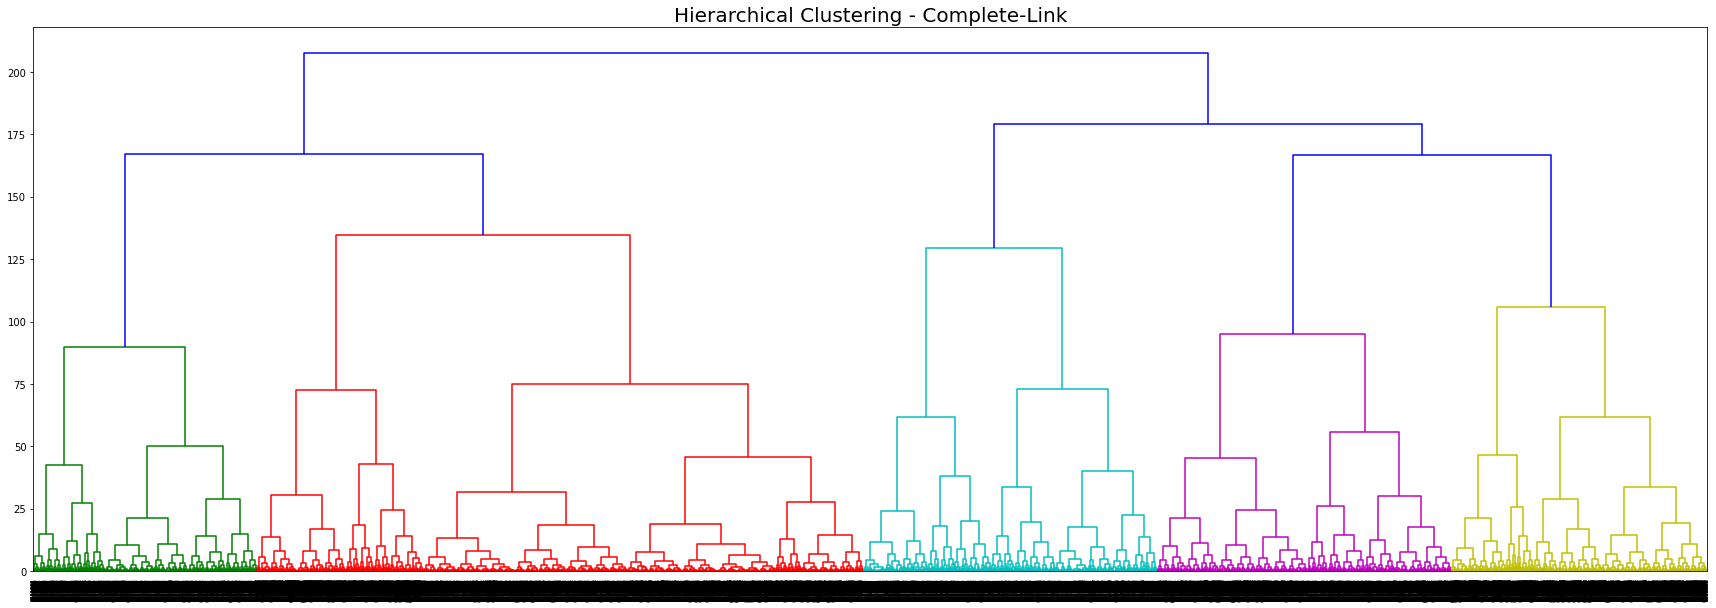

In [10]:
linkage_matrix_complete = complete(dist)

# plot
plt.subplots(figsize=(30, 10)) # set size
plt.title('Hierarchical Clustering - Complete-Link', fontsize=20)
dn_complete = dendrogram(linkage_matrix_complete, labels=labels);
plt.savefig('/content/gdrive/My Drive/碩一下/Capstone/cluster_complete.png', dpi=200)

####***1.4.3 Group Average***


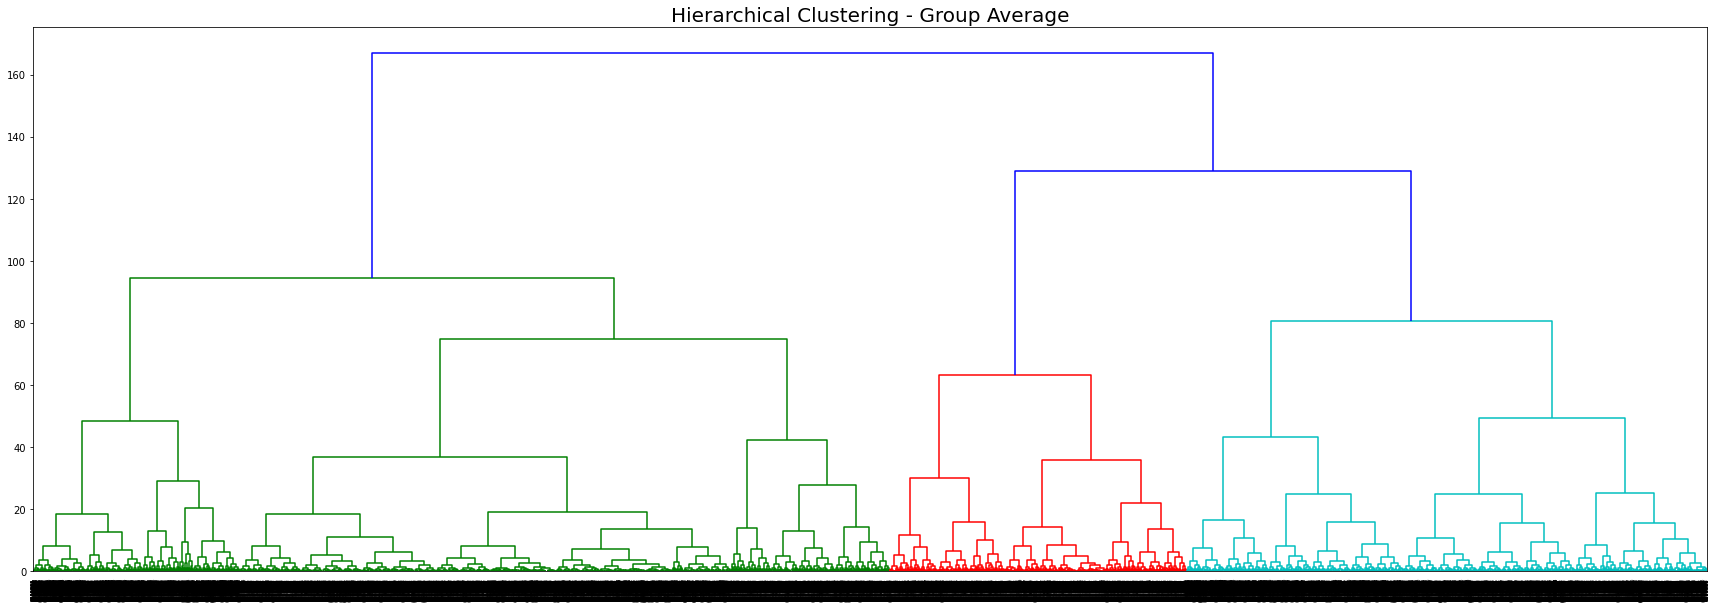

In [16]:
linkage_matrix_avg = average(dist)

# plot
plt.subplots(figsize=(30, 10)) # set size
plt.title('Hierarchical Clustering - Group Average', fontsize=20)
dn_avg = dendrogram(linkage_matrix_avg, labels=labels);
plt.savefig('/content/gdrive/My Drive/碩一下/Capstone/cluster_avg.png', dpi=200)

####***1.4.4 Ward***


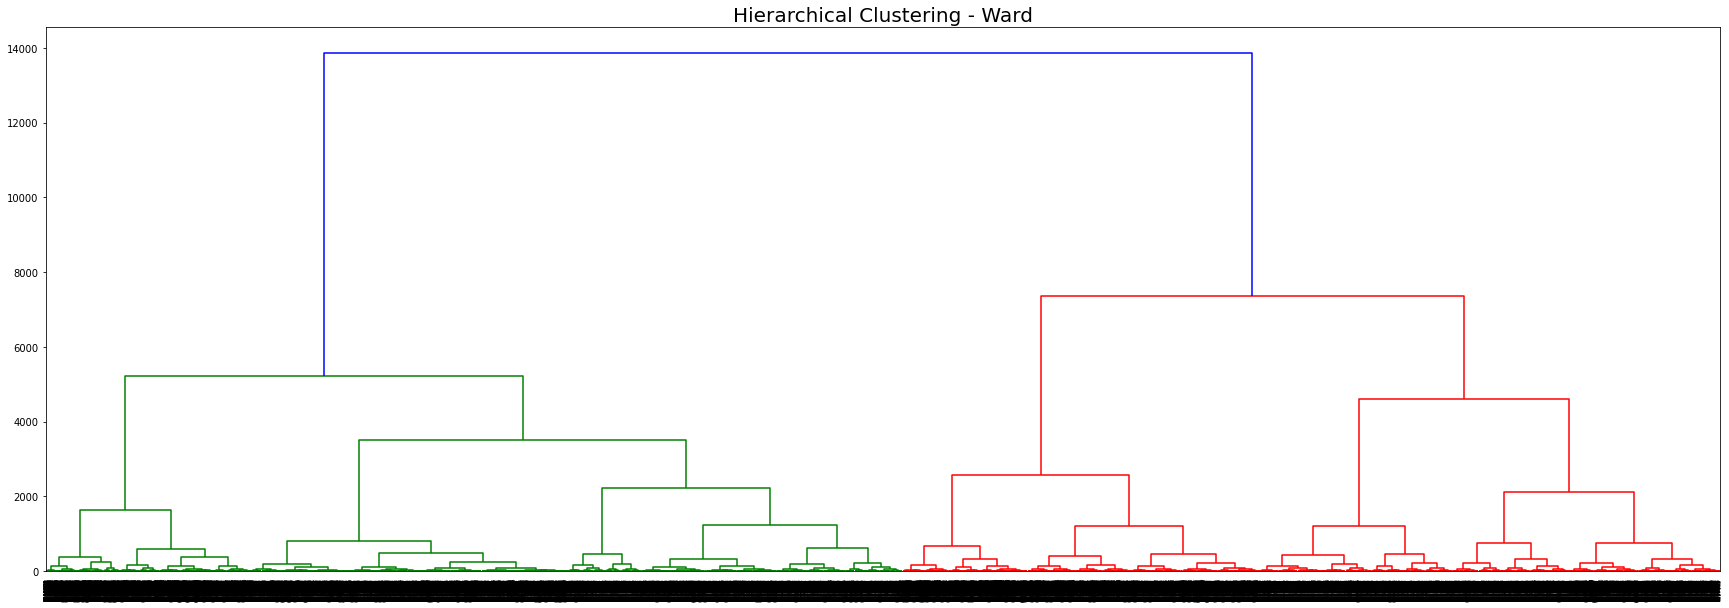

In [17]:
linkage_matrix_ward = ward(dist) 

# plot
plt.subplots(figsize=(30, 10)) # set size
plt.title('Hierarchical Clustering - Ward', fontsize=20)
dn_ward = dendrogram(linkage_matrix_ward, labels=labels);
plt.savefig('/content/gdrive/My Drive/碩一下/Capstone/cluster_ward.png', dpi=200)

###**1.5 Set a threshold**


In [22]:
# Set a threshold
k = 3
kc = 5
kg = 4
kw = 4

# Single-link
# cluster_single = fcluster(linkage_matrix_single,k,criterion='maxclust')
# df['cluster_single'] = cluster_single

# Complete-link
cluster_complete_3 = fcluster(linkage_matrix_complete,k,criterion='maxclust')
df['cluster_complete_3'] = cluster_complete_3
cluster_complete_5 = fcluster(linkage_matrix_complete,kc,criterion='maxclust')
df['cluster_complete_5'] = cluster_complete_5

# Group-average
cluster_avg_3 = fcluster(linkage_matrix_avg,k,criterion='maxclust')
df['cluster_avg_3'] = cluster_avg_3
cluster_avg_4 = fcluster(linkage_matrix_avg,kg,criterion='maxclust')
df['cluster_avg_4'] = cluster_avg_4

# Ward
cluster_ward_3 = fcluster(linkage_matrix_ward,k,criterion='maxclust')
df['cluster_ward_3'] = cluster_ward_3
cluster_ward_4 = fcluster(linkage_matrix_ward,kw,criterion='maxclust')
df['cluster_ward_4'] = cluster_ward_4


###**1.6 Save the results**

In [23]:
df.to_csv("/content/gdrive/My Drive/碩一下/Capstone/hierarchical_textcluster_pca2.csv")

###**1.7 Visualization**

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_tfidfVector(clusterType):
  x_axis = [o[0] for o in tfidf_pca]
  y_axis = [o[1] for o in tfidf_pca]
  plt.subplots(figsize=(8, 6)) # set size
  # plt.title(plotTitle, fontsize=20)
  sns.scatterplot(x=x_axis, y=y_axis, hue=clusterType, data=df)
  plt.show()

def plot_dist(clusterType):
  x_axis = [o[0] for o in dist]
  y_axis = [o[1] for o in dist]
  plt.subplots(figsize=(8, 6)) # set size
  # plt.title(plotTitle, fontsize=20)
  sns.scatterplot(x=x_axis, y=y_axis, hue=clusterType, data=df)
  plt.show()

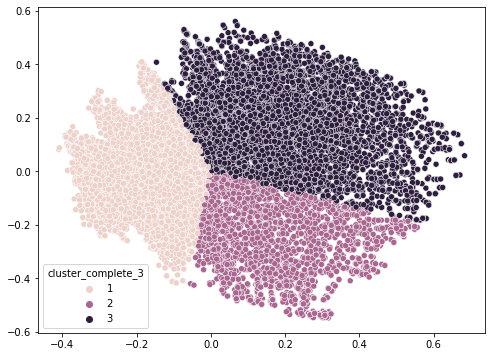

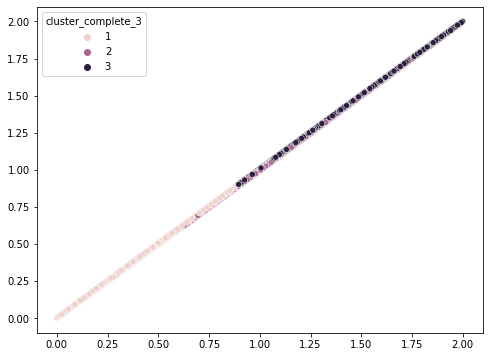

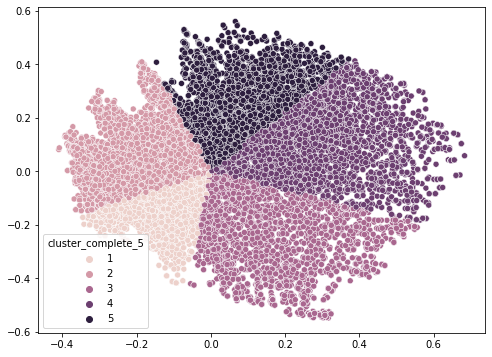

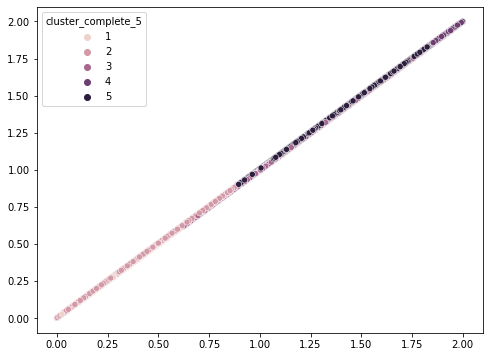

In [25]:
plot_tfidfVector('cluster_complete_3')
plot_dist('cluster_complete_3')

plot_tfidfVector('cluster_complete_5')
plot_dist('cluster_complete_5')

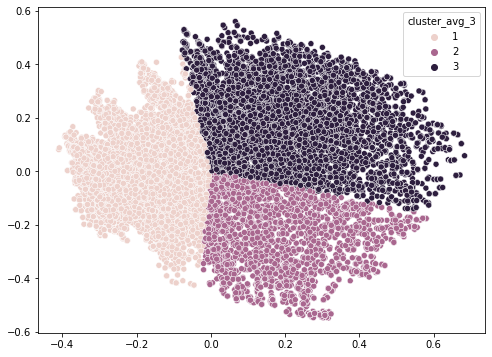

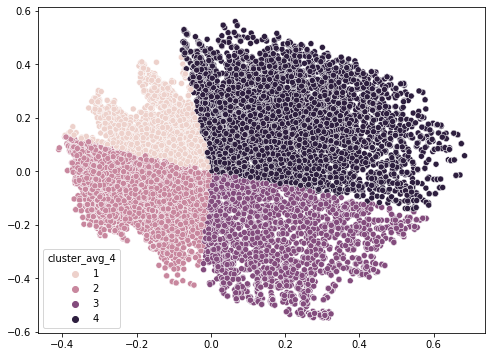

In [26]:
plot_tfidfVector('cluster_avg_3')
plot_tfidfVector('cluster_avg_4')

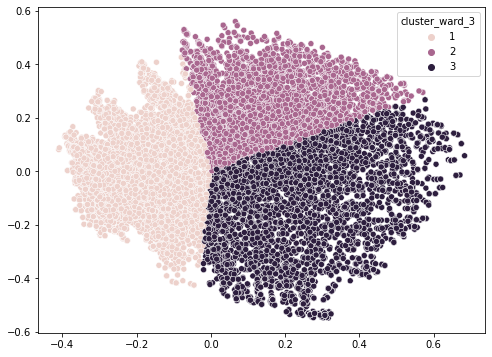

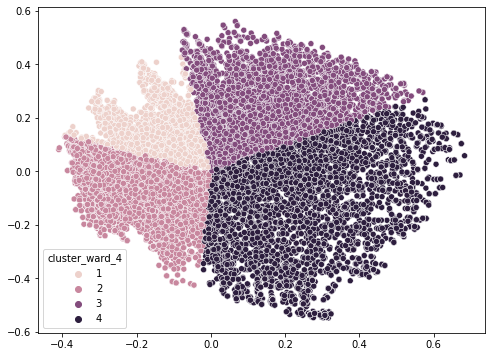

In [27]:
plot_tfidfVector('cluster_ward_3')
plot_tfidfVector('cluster_ward_4')